In [106]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics

In [107]:
def load_dataset():
    data = pandas.read_csv("titanic.csv", sep=";")
    data['Age'].fillna(data['Age'].mean(),inplace=True)
    data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    data['Cabin'] = data.Cabin.fillna('G6')
    data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return data

In [108]:
data = load_dataset()

In [109]:
x= data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

In [110]:
def split_dataset(data):
    global x,y
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
    return {
        "x_train": x_train,
        "x_test": x_test,
        "y_train": y_train,
        "y_test": y_test
    }

In [111]:
def discover_dataset(data):
    print("Data Set Head:")
    print(data.head())
    print("Columns: ")
    print(data.columns)

In [112]:
data_split = split_dataset(data)

In [113]:
dtree = tree.DecisionTreeClassifier()  


In [114]:
def discover_dataset(data):
    print("Data Set Head:")
    print(data.head())
    print("Columns: ")
    print(data.columns)

In [115]:
data_split = split_dataset(data)

In [116]:
def apply_decision_tree(x_train,y_train,x_test,y_test):
    #applying tree algorithm
    dtree.fit(x_train, y_train)   #fitting our model
    y_pred = dtree.predict(x_test)   # evaluating our model
    print("score:{}".format(accuracy_score(y_test, y_pred)))

In [117]:
apply_decision_tree(data_split["x_train"],data_split["y_train"],data_split["x_test"],data_split["y_test"])

score:0.776536312849162


In [118]:
def plot_decision_tree():
    global x,y
    plt.figure(figsize = (30,20))
    plot_tree(dtree,filled = True, feature_names = x.columns, proportion = True)

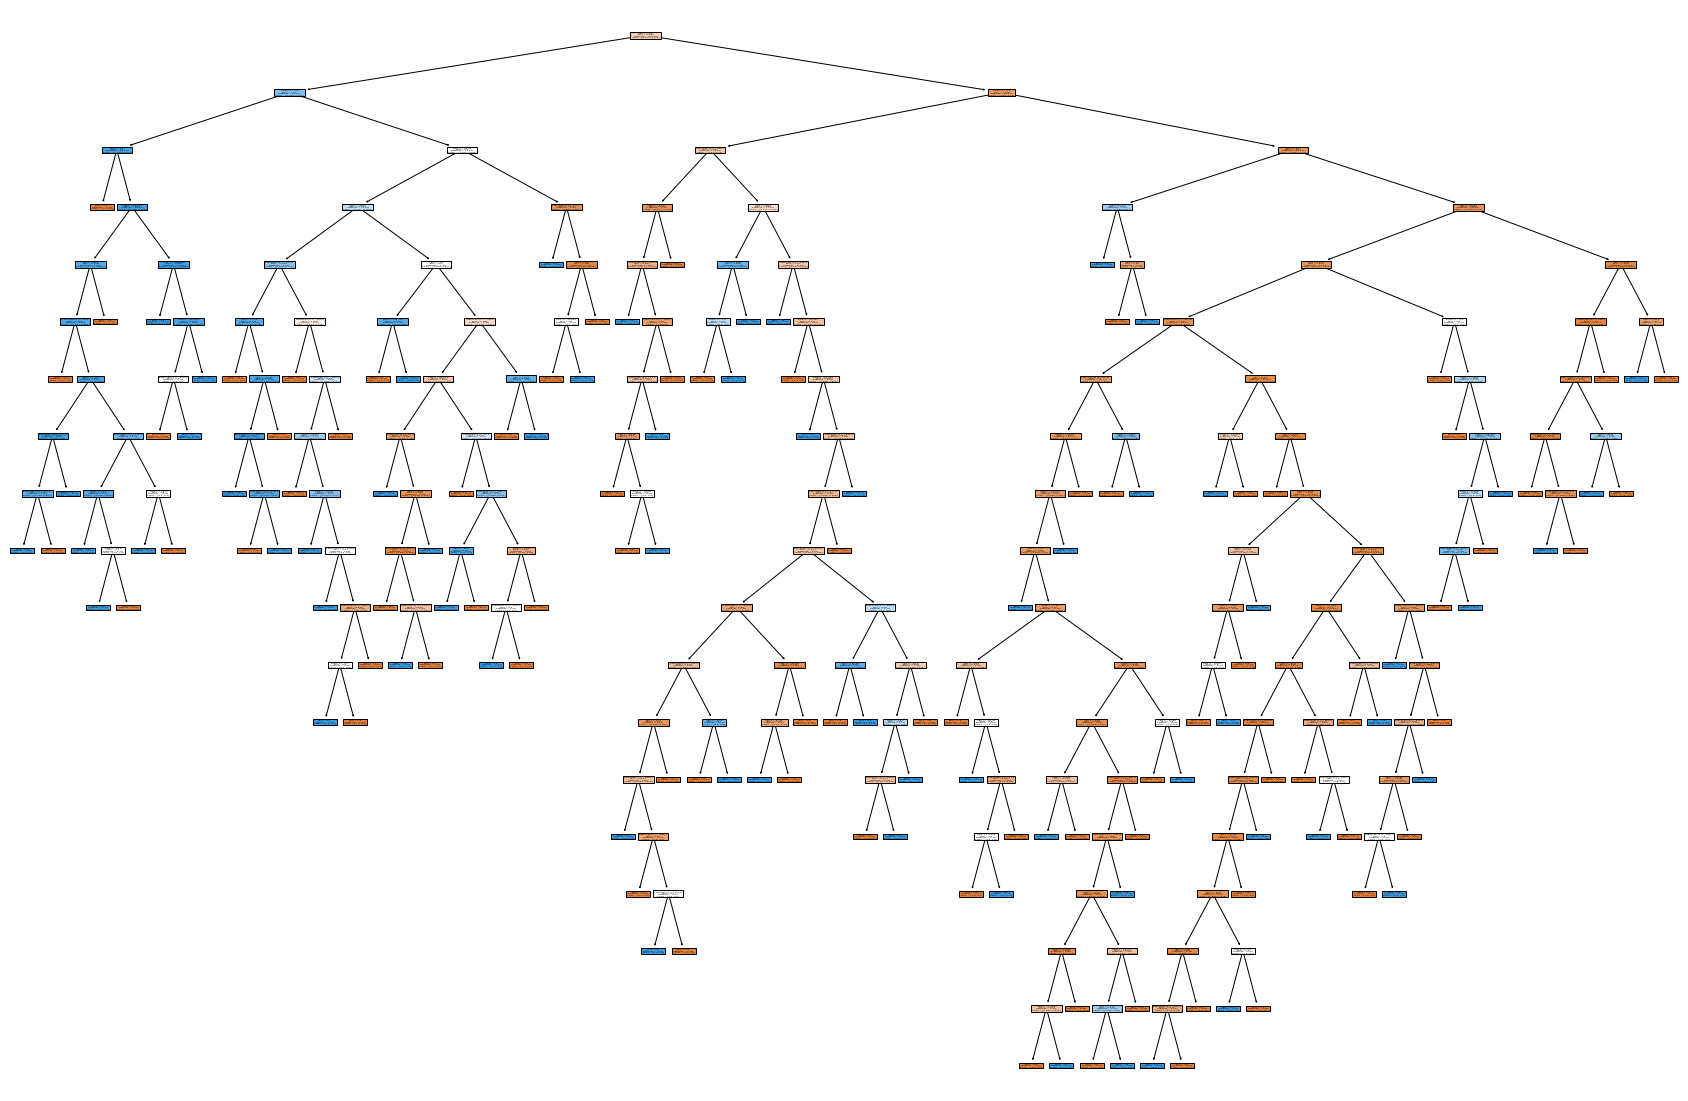

In [119]:
plot_decision_tree()

In [120]:
"""
    The tree check for the Sex in the first place, then for the Age, Then for the Pclass
"""

'\n    The tree check for the Sex in the first place, then for the Age, Then for the Pclass\n'

In [121]:
dtree = tree.DecisionTreeClassifier(criterion= "gini", splitter= "random",max_leaf_nodes= 10,min_samples_leaf= 5,max_depth= 5)  

score:0.7597765363128491


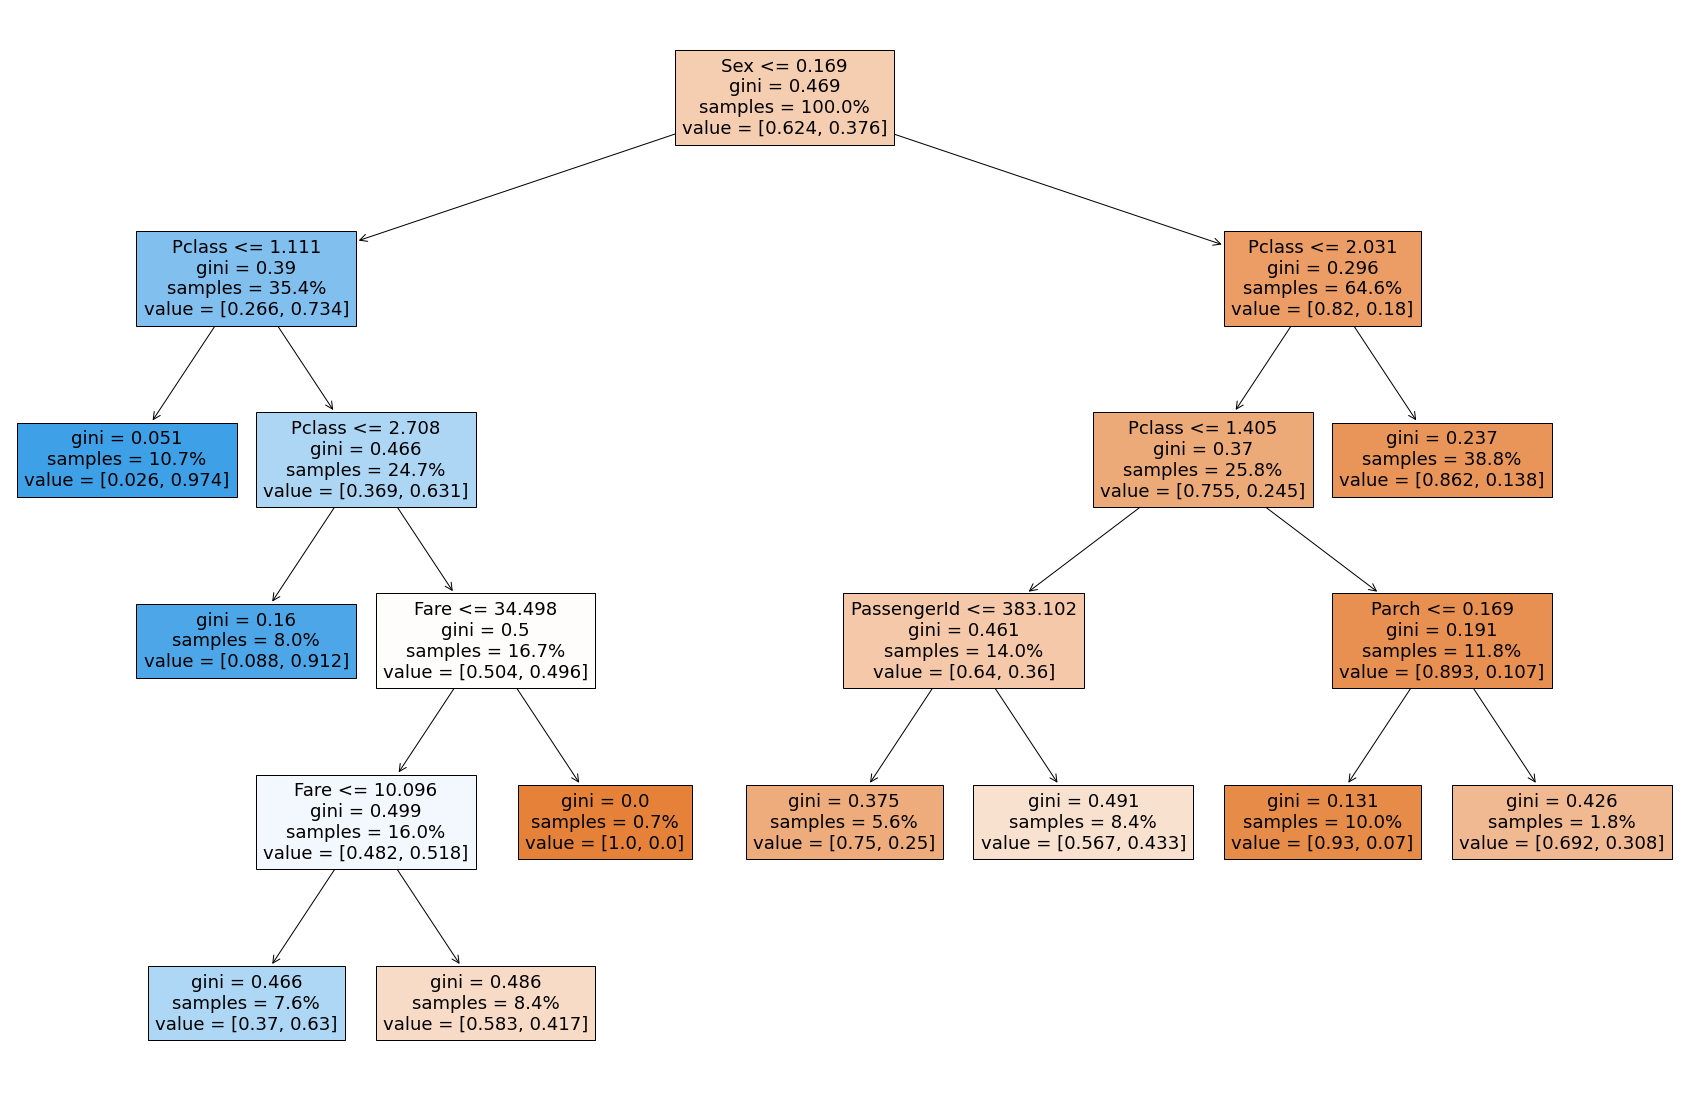

In [122]:
apply_decision_tree(data_split["x_train"],data_split["y_train"],data_split["x_test"],data_split["y_test"])
plot_decision_tree()

In [123]:
"""
    The Accuracy is pretty much the same
"""

'\n    The Accuracy is pretty much the same\n'

In [124]:
def apply_random_forest(x_train,x_test,y_train,y_test):
    clf = RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
    clf.fit(x_train, y_train)  #Training our model
    y_pred = clf.predict(x_test)  #testing our model
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [125]:
  #Measuring the accuracy of our model
  def apply_random_forest2(x_train,x_test,y_train,y_test):
    clf = RandomForestClassifier(n_estimators=100)  #Creating a random forest with 100 decision trees
    clf.fit(x_train, y_train)  #Training our model
    y_pred = clf.predict(x_test)  #testing our model
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [126]:
apply_random_forest(data_split["x_train"],data_split["x_test"],data_split["y_train"],data_split["y_test"])
apply_random_forest2(data_split["x_train"],data_split["x_test"],data_split["y_train"],data_split["y_test"])

Accuracy: 0.8324022346368715
Accuracy: 0.8659217877094972


In [127]:
"""
    The new accuracy is better than the previous one, means that the random forest product more accurate outputs than the decision tree
"""

'\n    The new accuracy is better than the previous one, means that the random forest product more accurate outputs than the decision tree\n'

In [128]:
"""
    The apply random forest2 produces slightly better accuracy than the first function, with that being said we can conclude that increase of number of estimators can help in some cases us produce more accurace random forest models.
"""

'\n    The apply random forest2 produces slightly better accuracy than the first function, with that being said we can conclude that increase of number of estimators can help in some cases us produce more accurace random forest models.\n'